<h1>Customer Demographics Analysis - Country Distribution</h1>

In [1]:
%pip install openpyxl
%pip install squarify
%pip install mplcursors

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
import squarify
import requests

In [3]:
# URL of the file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# Send a GET request to the URL
response = requests.get(url)

# Save the content to a local file
with open("Online_Retail.xlsx", "wb") as file:
    file.write(response.content)

In [4]:
df = pd.read_excel("Online_Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
#to delete the duplicate rows from the dataframe & count the rows in every column (drop_duplicates() method is used)
x = df.drop_duplicates()
x.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [6]:
#to delete the empty rows 
df = x.dropna()
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [7]:
# to convert quantities with negative values to positive because quantities cannot be negative
df.loc[:, 'Quantity'] = df['Quantity'].abs()

df.loc[:, 'CustomerID'] = df['CustomerID'].abs()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
#this shows the distribution of customers by country, indicating the number of transactions made from each country.
# Analyze customer demographics - country distribution
country_distribution = df['Country'].value_counts()

# Print the country distribution
print(country_distribution)

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

<h4>Distribution of Transactions by Country</h4>
<h5>The dataset reveals the distribution of transactions by country. Here are the top 10 countries with the highest number of transactions:</h5>
<ol type="1">
    <li><strong>United Kingdom:</strong> 356,728 transactions</li>
<li><strong>Germany:</strong> 9,480 transactions</li>
<li><strong>France:</strong> 8,475 transactions</li>
<li><strong>EIRE:</strong> 7,475 transactions</li>
<li><strong>Spain:</strong> 2,528 transactions</li>
<li><strong>Netherlands:</strong> 2,371 transactions</li>
<li><strong>Belgium:</strong> 2,069 transactions</li>
<li><strong>Switzerland:</strong> 1,877 transactions</li>
<li><strong>Portugal:</strong> 1,471 transactions</li>
<li><strong>Australia:</strong> 1,258 transactions</li>

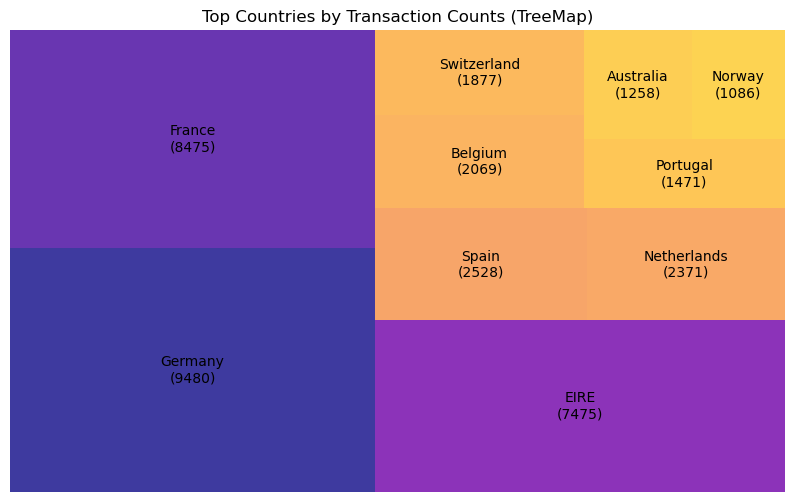

In [9]:
#graph gives information about total transactions done by top 10 countries

# Select the top N countries with the highest transaction counts
top_countries = country_distribution.iloc[1:11] 
# Excluded the first country (largest transaction count) and selected the top 10 countries because country with largest transaction count is outlied than other top counts

# Prepare labels with country names and transaction counts
labels = [f"{country}\n({count})" for country, count in zip(top_countries.index, top_countries.values)]

# Define a color palette (e.g., using 'plasma' colormap we can use viridis also)
colors = plt.cm.plasma_r(top_countries.values / float(top_countries.values.max()))

# Plot TreeMap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_countries.values, label=labels, color=colors, alpha=0.8)
plt.axis('off')
plt.title('Top Countries by Transaction Counts (TreeMap)')

plt.show()

<h4>Visualization:</h4> 
<p>Top Countries by Transaction Counts (TreeMap)</p>
<p>A TreeMap plot visualizes the top 10 countries (excluding the United Kingdom due to its outlier status) by transaction counts, providing a clear visual distribution. The United Kingdom dominates, followed by Germany, France, and EIRE.</p>

In [10]:
# Calculate total sales (Quantity * UnitPrice) for each country
df.loc[:,'Total_Sales'] = df['Quantity'] * df['UnitPrice']

# Group by 'Country' and sum the total sales for each country
country_sales = df.groupby('Country')['Total_Sales'].sum().reset_index()

# Sort by total sales in descending order
country_sales = country_sales.sort_values(by='Total_Sales', ascending=False)

# Rename columns for consistency
country_sales.columns = ['Country', 'Total_Sales']

# Display the first few rows of the DataFrame
print(country_sales)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


                 Country  Total_Sales
35        United Kingdom  7822893.134
23           Netherlands   286231.140
10                  EIRE   280523.140
14               Germany   235847.330
13                France   221242.570
0              Australia   139897.850
30                 Spain    68361.090
32           Switzerland    57148.500
3                Belgium    41481.720
31                Sweden    40150.250
19                 Japan    39492.120
26              Portugal    37755.920
24                Norway    37167.420
29             Singapore    33438.190
12               Finland    22765.420
6        Channel Islands    20804.690
9                Denmark    19142.540
18                 Italy    18075.970
7                 Cyprus    14146.940
1                Austria    10243.040
25                Poland     7456.160
17                Israel     7443.280
33                   USA     5429.860
15                Greece     4810.520
16               Iceland     4310.000
5           

<h4>Country-wise Total Sales</h4>
<h5>The total sales for each country were calculated by multiplying the quantity of items purchased by the unit price. The top five countries in terms of total sales are:</h5>
<ol type="1">
<li><strong> United Kingdom: </strong> &dollar;7,822,893 </li>
<li><strong> Netherlands: </strong> &dollar;286,231</li>
<li><strong> EIRE: </strong> &dollar;280,523</li>
<li><strong> Germany: </strong> &dollar;235,847</li>
<li><strong> France: </strong> &dollar;221,243</li>
    <p>These countries represent the highest revenue sources for the business.</p>

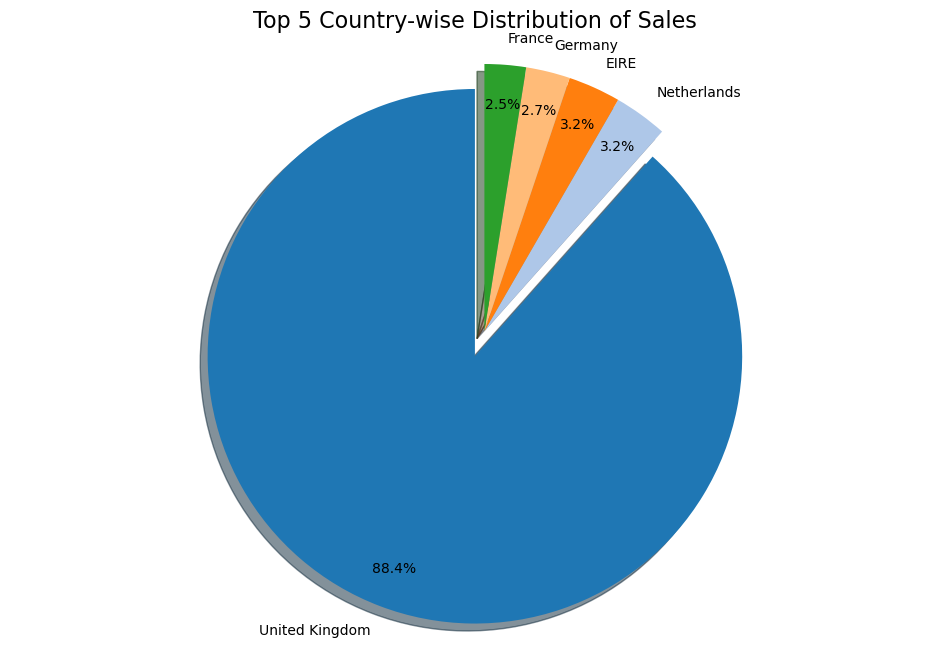

In [11]:
# Plotting the pie chart
plt.figure(figsize=(12, 8))
top_countries = country_sales.nlargest(5, 'Total_Sales')
plt.pie(top_countries['Total_Sales'],
        labels=top_countries['Country'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=(0.1,) + (0,) * (len(top_countries) - 1),  # Explode the first slice (optional)
        pctdistance=0.85,       # Distance of percentage from center
        colors=plt.cm.tab20.colors)  # Custom colors

plt.title('Top 5 Country-wise Distribution of Sales', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

<h4>Visualization :</h4>
<h5>Top 5 Country-wise Distribution of Sales</h5>
<p>A pie chart visualizing the distribution of sales among the top five countries shows that the United Kingdom dominates with a significant share of total sales, followed by the Netherlands, EIRE, Germany, and France.</p>

In [12]:
# Group by 'Country' and calculate the mean of 'UnitPrice' for each group
average_price_by_country = df.groupby('Country')['UnitPrice'].mean()

# Display the average price in each country
print(average_price_by_country)

Country
Australia                 3.217806
Austria                   4.243192
Bahrain                   4.644118
Belgium                   3.644335
Brazil                    4.456250
Canada                    6.030331
Channel Islands           4.936460
Cyprus                    6.350311
Czech Republic            2.938333
Denmark                   3.256941
EIRE                      5.111607
European Community        4.820492
Finland                   5.448705
France                    5.053124
Germany                   3.969772
Greece                    4.885548
Iceland                   2.644011
Israel                    3.670648
Italy                     4.831121
Japan                     2.276145
Lebanon                   5.387556
Lithuania                 2.841143
Malta                     5.244173
Netherlands               2.738317
Norway                    6.012026
Poland                    4.170880
Portugal                  8.771754
RSA                       4.277586
Saudi Arabia

<h4>Average Unit Price by Country Top 5</h4>
<p>The average unit price for each country shows variability in pricing:</p>
<ol type="1">
    <li><strong>Singapore:</strong> &dollar;109.65</li>
    <li><strong>Portugal:</strong> &dollar;8.77</li>
    <li><strong>Cyprus:</strong> &dollar;6.35</li>
    <li><strong>Norway:</strong> &dollar;6.01</li>
    <li><strong>Canada:</strong> &dollar;6.03</li>
<p>This indicates differing price levels across markets, with Singapore having a notably high average unit price.</p>

In [13]:
# Filter the DataFrame for transactions from Singapore and extract the 'UnitPrice' column
unit_prices_singapore = df.loc[df['Country'] == 'Singapore', 'UnitPrice']
#avaerage_unit_price_singapore_ = df.loc[df['Country'] == 'Singapore', 'UnitPrice'].mean()
# Display the unit prices of Singapore
print(unit_prices_singapore)

70758        0.36
70759        2.95
70760        2.95
70761        0.21
70762        0.21
           ...   
398370       3.75
406404    3949.32
406405    2118.74
406406    3949.32
406407    2118.74
Name: UnitPrice, Length: 229, dtype: float64


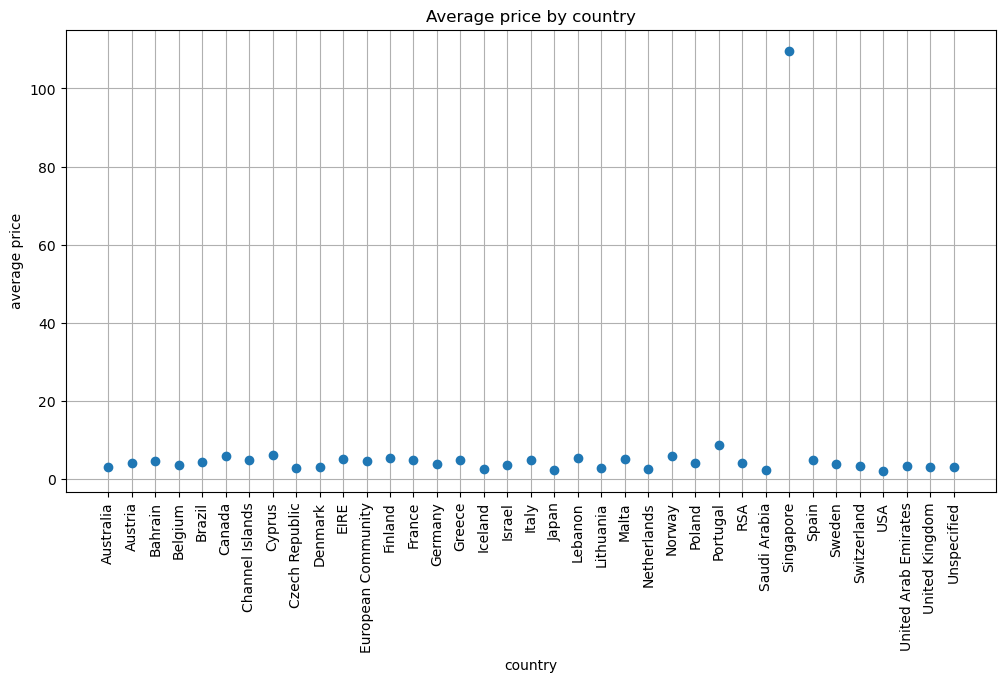

In [14]:
import mplcursors

plt.figure(figsize=(12, 6))
plt.plot(average_price_by_country.index, average_price_by_country.values, marker='o', linestyle='')
plt.title('Average price by country')
plt.xlabel('country')
plt.ylabel('average price')
plt.xticks(rotation=90)
plt.grid(True)

#for i, count in enumerate(average_price_by_country.values):
    #plt.text(average_price_by_country.index[i], count, str(count), ha='right', va='bottom')

plt.show()

<h4>Visualization:</h4> 
<p>Average Unit Price by Country</p>
<p>A plot of the average unit price by country shows how prices vary, with some countries like Singapore and Portugal standing out for higher prices.<p>

<h1>Sales Trends Analysis</h1>

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


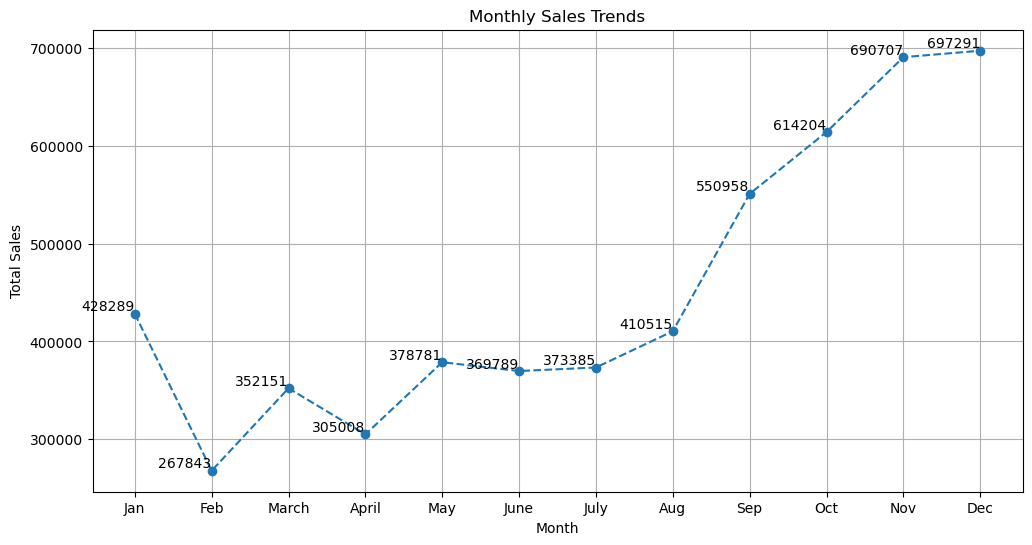

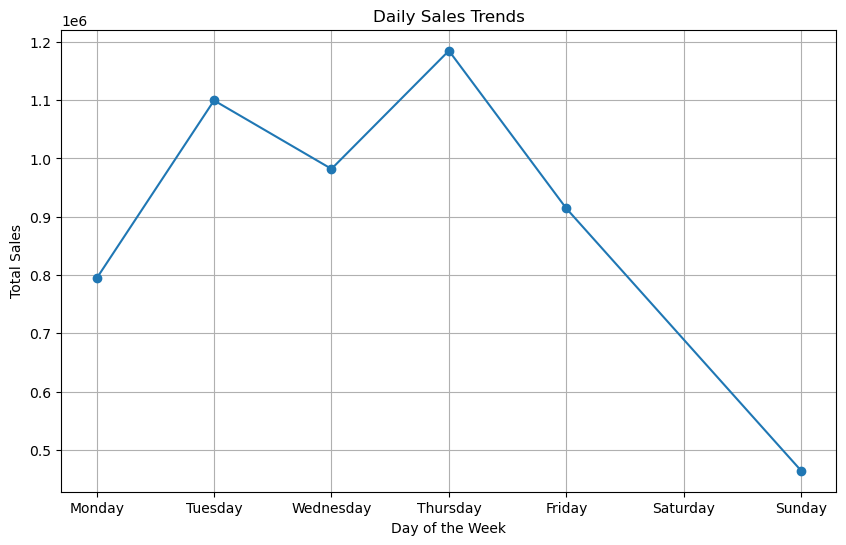

The busiest month in terms of sales is : December , sales of about : 697291
The busiest day of the week in terms of sales is : Thursday ,sales of about : 1184782


In [15]:
#to find top monthly and daily sales
# Convert 'InvoiceDate' column to datetime
df.loc[:,'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and day of the week
df.loc[:,'Month'] = df['InvoiceDate'].dt.month
df.loc[:,'DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6

# Group by month and sum the sales
monthly_sales = df.groupby('Month')['Quantity'].sum()

# Group by day of the week and sum the sales
daily_sales = df.groupby('DayOfWeek')['Quantity'].sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='--')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13),['Jan', 'Feb', 'March', "April",'May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
for i, count in enumerate(monthly_sales.values):
    plt.text(monthly_sales.index[i], count, str(count), ha='right', va='bottom')

plt.show()

# Plot daily sales trends
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Daily Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

months = ['Jan', 'Feb', 'March', "April",'May','June','July','Aug','Sep','Oct','Nov','December']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Identify busiest months
busiest_months = monthly_sales.idxmax()
print("The busiest month in terms of sales is :",months[busiest_months-1], ", sales of about :", monthly_sales.max())

# Identify busiest days of the week
busiest_day = daily_sales.idxmax()
print("The busiest day of the week in terms of sales is :",days[busiest_day],',sales of about :',daily_sales.max())

<strong> Monthly Sales Trends</strong>
<p>The monthly sales trends reveal the busiest months:</p>
<ul>
<li><strong>December:</strong>  The highest sales, indicating a peak likely due to holiday shopping.</li>
<li><strong>October and November:</strong>  Also show high sales volumes.</li></ul>

<strong> Daily Sales Trends</strong>
<ul>
<p>The analysis of sales by the day of the week shows that:</p>
<li><strong>Thursday:</strong> The highest sales, suggesting mid-week might be the peak shopping period</li>
<li><strong>Tuesday:</strong> Another high sales day</li></ul>

<strong> Busiest Months and Days</strong>
<ul>
<li><strong>Busiest Month:</strong>  December with the highest total sales of approximately 7,00,000 units.</li>
<li><strong>Busiest Day of the Week:</strong> Thursday with the highest total sales of arounf 12,00,000
units.</li></ul>

<h4>Visualization: </h4>
<h5>Monthly Sales Trends</h5>
<p>A line plot shows monthly sales trends, with clear peaks in the holiday season (December) and dips in early months.</p>

<h5>Daily Sales Trends</h5>
<p>A line plot of daily sales trends shows the variation in sales across the week, with a peak mid-week and a dip on weekends.</p>

<h3>Insights and Potential Actions</h3>
<ol type="1">
    <li><strong>Market Dominance in the UK:</strong> The United Kingdom is the primary market. Consider focusing marketing and sales efforts on this region to maintain and grow this dominant market share.</li>    
    <li><strong>International Market Expansion:</strong> Given significant sales in the Netherlands, EIRE, Germany, and France, consider tailored marketing strategies to further penetrate these markets.</li>
    <li><strong>Pricing Strategies:</strong>The variation in average unit prices across countries suggests an opportunity to review and potentially optimize pricing strategies to align with local market conditions and customer expectations.</li>
    <li><strong>Seasonal Promotions:</strong> The peak in sales during November and December suggests the effectiveness of holiday promotions. Planning targeted campaigns for these months can maximize revenue.</li>
    <li><strong>Mid-Week Promotions:</strong> Since Thursday and Tuesday are high sales days, consider mid-week promotions or sales events to capitalize on this trend.</li>
    <li><strong>Customer Retention:</strong> Implementing loyalty programs or special offers for top purchasing countries can help retain valuable customers and encourage repeat purchases.</li><br>
<p>By focusing on these key areas, the business can enhance its sales strategy, better meet customer needs, and drive overall growth.</p>